In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [38]:
start = '2015-01-01'
end = '2025-01-01'
stock = 'GOOG'
stock = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [39]:
data = stock


In [40]:
data.reset_index(inplace=True)


In [41]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2015-01-02,26.045292,26.365890,26.010056,26.253730,28951268
1,2015-01-05,25.502361,26.021471,25.462164,25.968368,41196796
2,2015-01-06,24.911289,25.616753,24.866129,25.558439,57998800
3,2015-01-07,24.868612,25.173526,24.796651,25.161417,41301082
4,2015-01-08,24.947021,24.986724,24.367366,24.714266,67071641
...,...,...,...,...,...,...
2511,2024-12-24,197.345184,197.445061,194.975874,195.946768,6809800
2512,2024-12-26,196.875717,197.934509,195.647106,196.516126,7907900
2513,2024-12-27,193.819183,196.576052,191.753543,196.246426,14693000


In [42]:
ma_100_days = data.Close.rolling(100).mean()

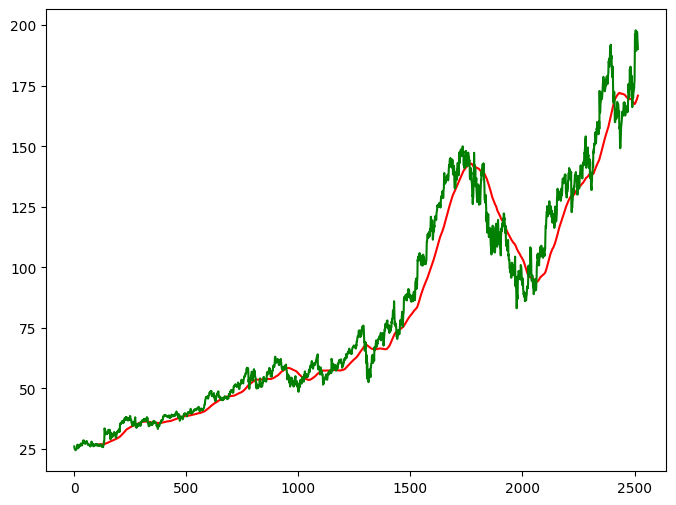

In [43]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')

In [44]:
ma_200_days = data.Close.rolling(200).mean()

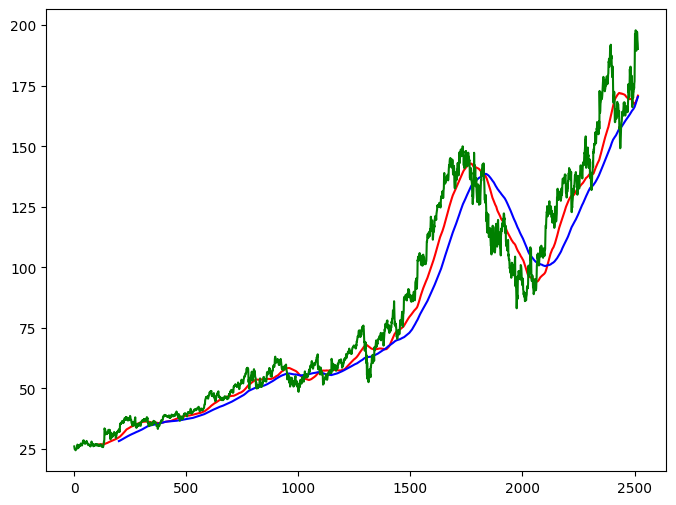

In [45]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [46]:
data.dropna(inplace=True)

In [47]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [48]:
data_train.shape[0],data_test.shape[0]

(2012, 504)

In [49]:
data_test.shape[0]

504

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [51]:
data_train_scale = scaler.fit_transform(data_train)

In [52]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [53]:
x = []
y = []
for i in range(100, data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i]) # Access data_train_scale elements directly.
  y.append(data_train_scale[i,0])

x, y = np.array(x), np.array(y) # Convert x and y to NumPy arrays.

model= Sequential()
model.add(LSTM(units=50, activation= 'relu', return_sequences =True,
               input_shape = (x.shape[1], 1))) # Access the shape of NumPy array x.
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation = 'relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation = 'relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation = 'relu',return_sequences=True))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [54]:
model.compile(optimizer='adam',loss = 'mean_squared_error')

In [55]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 133ms/step - loss: 0.1155
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.0809
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0739
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0748
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0737
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0806
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0763
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0792
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0735
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0749
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0746
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0702
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0710
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0727
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0746
E

In [56]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 100, 120)       │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 100, 120)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100, 1)         │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [57]:
pas_100_days = data_train.tail(100)

In [58]:
data_test = pd.concat([pas_100_days,data_test], ignore_index=True)

In [59]:
data_test_scale = scaler.fit_transform(data_test)

In [60]:
x = []
y = []
for i in range(100, data_test_scale.shape[0]): # Use data_test_scale.shape[0]
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])


x,y =np.array(x),np.array(y)




In [61]:
y_predict = model.predict(x)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step


In [62]:
scale =1/scaler.scale_

In [63]:
y= y*scale

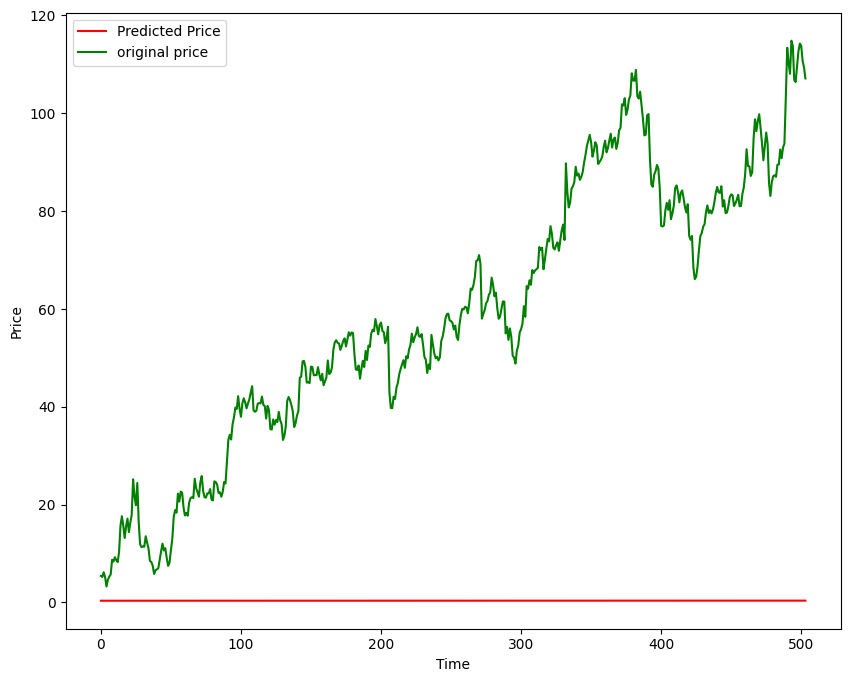

In [64]:
plt.figure(figsize=(10,8))
plt.plot(y_predict[:, -1, 0], 'r',label = 'Predicted Price')
plt.plot(y, 'g', label = 'original price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [65]:
model.save('Stock Predictions Model.keras')